## Import Library

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

## Dataset Loading

In [2]:
file_path = "finalDataset0.2.xlsx"
df = pd.ExcelFile(file_path)
data = df.parse('finalDataset0.2')

## Column definition for sentiment analysis

In [14]:
columns_map = {
    'teaching': 'teaching.1',
    'coursecontent': 'coursecontent.1',
    'examination': 'Examination',
    'labwork': 'labwork.1',
    'library_facilities': 'library_facilities',
    'extracurricular': 'extracurricular.1'
}

## Helper function for sentiment

In [4]:
def get_sentiment_label(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

In [5]:
for num_col, text_col in columns_map.items():
    score_col = f"{text_col}_sentiment_score"
    label_col = f"{text_col}_sentiment_label"
    
    data[score_col] = data[text_col].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
    data[label_col] = data[score_col].apply(get_sentiment_label)

## Sentiment Summary

In [6]:
summary = {}
for text_col in columns_map.values():
    label_col = f"{text_col}_sentiment_label"
    summary[text_col] = data[label_col].value_counts(normalize=True) * 100

summary_df = pd.DataFrame(summary).fillna(0).T
print("Sentiment Distribution (%)")
print(summary_df)

Sentiment Distribution (%)
                     Negative     Neutral   Positive
teaching.1           7.027027    4.324324  88.648649
coursecontent.1      7.567568   18.378378  74.054054
Examination          8.648649   10.270270  81.081081
labwork.1           11.351351   12.432432  76.216216
library_facilities   0.000000  100.000000   0.000000
extracurricular.1    4.324324   14.054054  81.621622


## Sentiment Distribution Visualization 

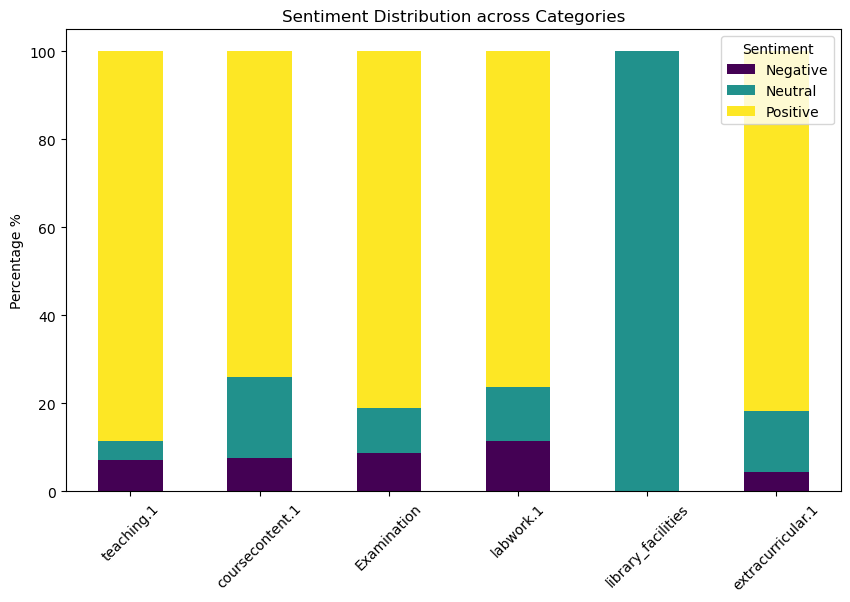

In [7]:
summary_df.plot(kind='bar', stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Sentiment Distribution across Categories")
plt.ylabel("Percentage %")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()

## Word Frequency via WordCloud (combine all feedback)

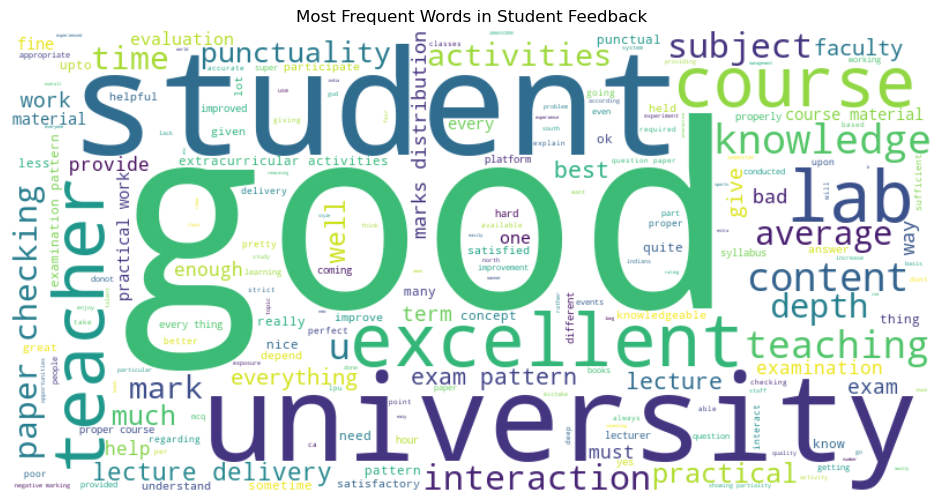

In [8]:
all_text = " ".join(data[col].astype(str).str.lower().str.cat(sep=" ") for col in columns_map.values())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Student Feedback")
plt.show()


Numeric Ratings vs Sentiment for Teaching:
teaching.1_sentiment_label   Negative    Neutral   Positive
teaching                                                   
-1                          23.076923  15.384615  61.538462
 0                          25.714286   5.714286  68.571429
 1                           0.729927   2.919708  96.350365


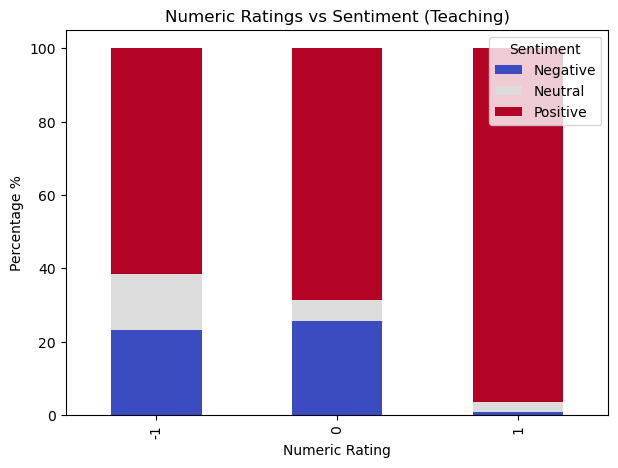


Numeric Ratings vs Sentiment for Coursecontent:
coursecontent.1_sentiment_label   Negative    Neutral   Positive
coursecontent                                                   
-1.0                             23.333333  50.000000  26.666667
 0.0                             19.230769  11.538462  69.230769
 1.0                              1.562500  12.500000  85.937500


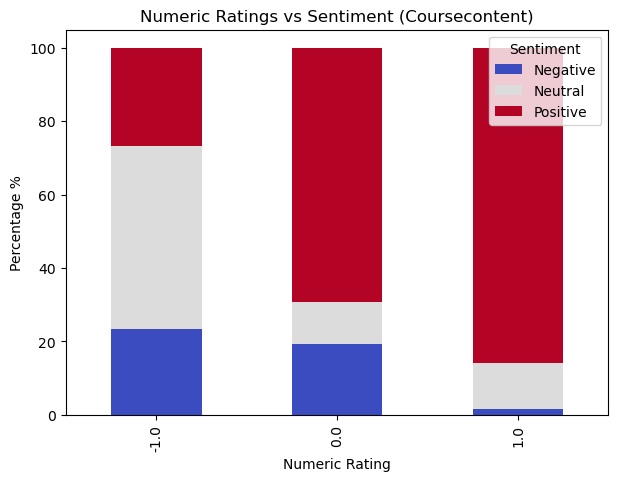


Numeric Ratings vs Sentiment for Examination:
Examination_sentiment_label   Negative    Neutral   Positive
examination                                                 
-1.0                         45.833333  25.000000  29.166667
 0.0                         16.666667   6.666667  76.666667
 1.0                          0.000000   8.461538  91.538462


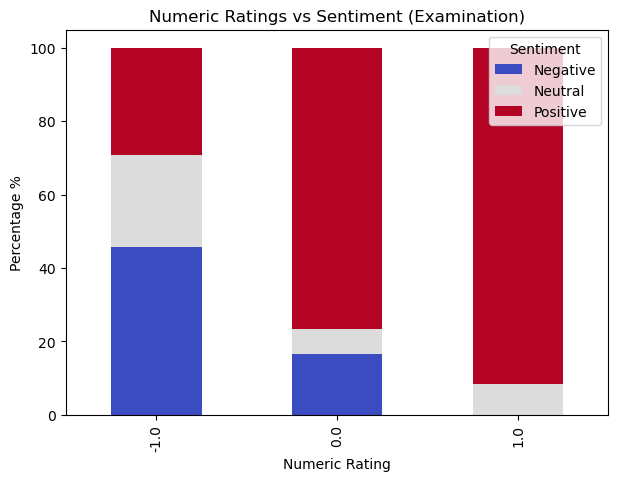


Numeric Ratings vs Sentiment for Labwork:
labwork.1_sentiment_label   Negative    Neutral   Positive
labwork                                                   
-1                         37.837838  27.027027  35.135135
 0                         37.500000  18.750000  43.750000
 1                          0.757576   7.575758  91.666667


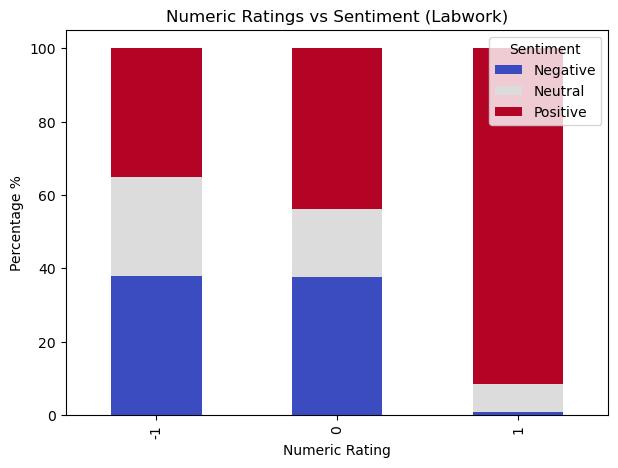


Numeric Ratings vs Sentiment for Library_facilities:
library_facilities_sentiment_label  Neutral
library_facilities                         
-1.0                                  100.0
 0.0                                  100.0
 1.0                                  100.0


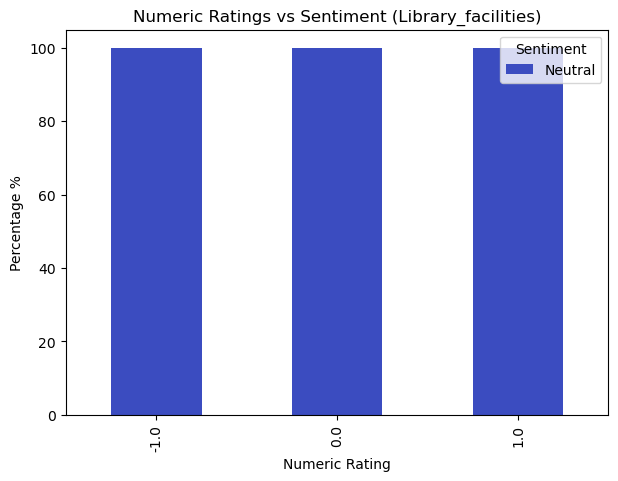


Numeric Ratings vs Sentiment for Extracurricular:
extracurricular.1_sentiment_label   Negative    Neutral   Positive
extracurricular                                                   
-1                                  0.000000  41.666667  58.333333
 0                                 36.842105  26.315789  36.842105
 1                                  0.649351  10.389610  88.961039


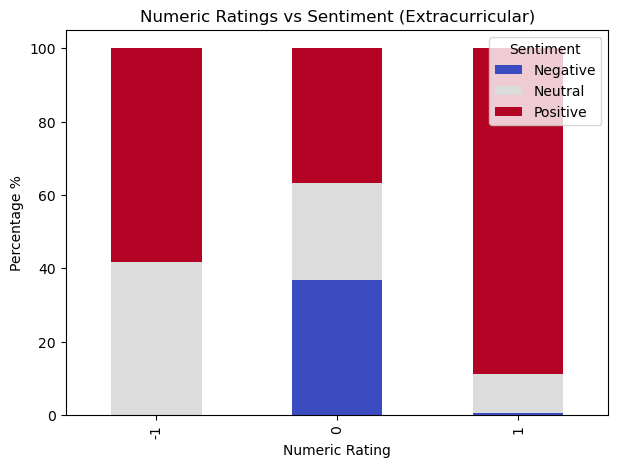

In [11]:
for num_col, text_col in columns_map.items():
    label_col = f"{text_col}_sentiment_label"
    
    cross_tab = pd.crosstab(data[num_col], data[label_col], normalize='index') * 100
    print(f"\nNumeric Ratings vs Sentiment for {num_col.capitalize()}:")
    print(cross_tab)
    
    cross_tab.plot(kind="bar", stacked=True, figsize=(7,5), colormap="coolwarm")
    plt.title(f"Numeric Ratings vs Sentiment ({num_col.capitalize()})")
    plt.ylabel("Percentage %")
    plt.xlabel("Numeric Rating")
    plt.legend(title="Sentiment")
    plt.show()

## Correlation Heatmap (Numeric Ratings vs Sentiment Scores)

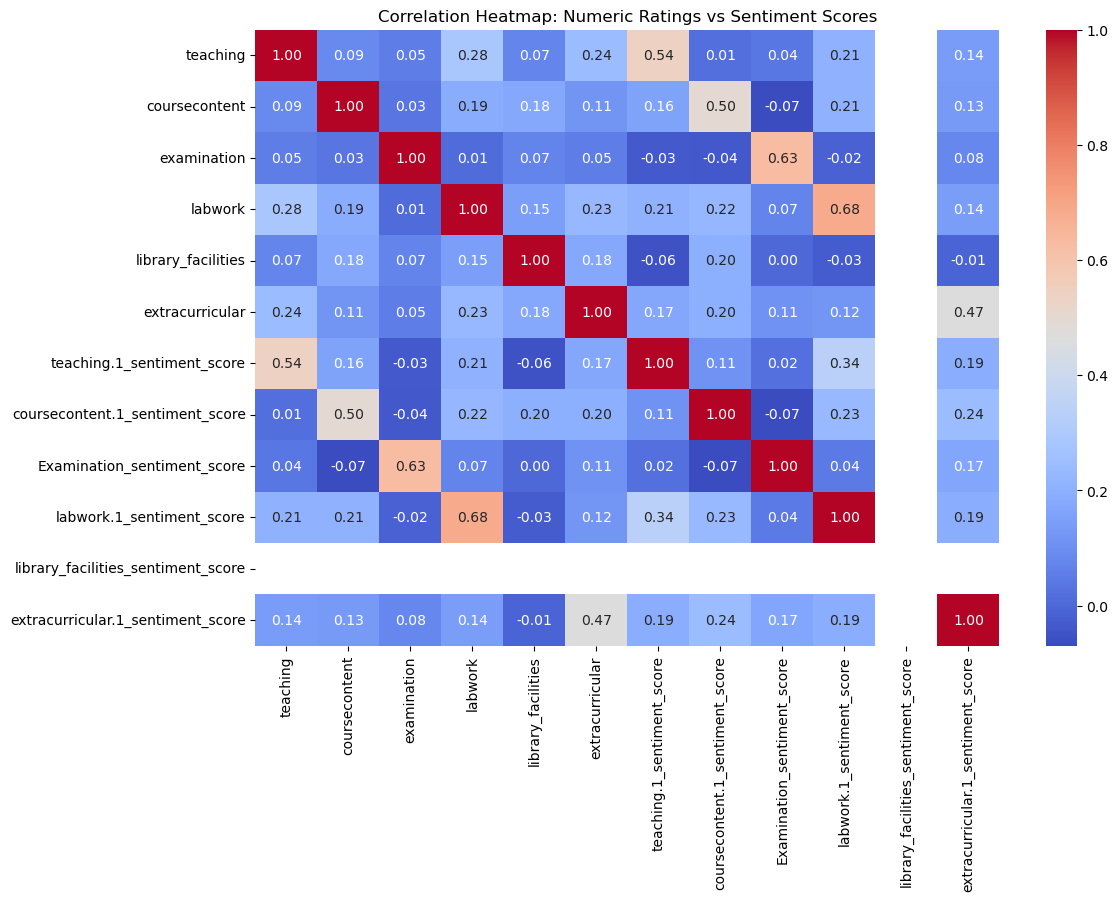

In [12]:
numeric_cols = list(columns_map.keys())
sentiment_score_cols = [f"{col}_sentiment_score" for col in columns_map.values()]

corr_df = data[numeric_cols + sentiment_score_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Numeric Ratings vs Sentiment Scores")
plt.show()